In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

sns.set_style("darkgrid")

In [2]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

In [3]:
Time_Series_1 = pd.read_csv('Time_Series_1_new.csv')

In [4]:
Time_Series_1

,Fecha,Ventas
0,2022-06-21,59.99
1,2021-08-03,12.72
2,2022-08-21,11.20
3,2022-07-09,48.97
4,2022-05-14,22.95
...,...,...
704350,2022-02-10,18.90
704351,2022-06-02,-29.99
704352,2022-05-19,75.00
704353,2022-02-17,-10.70


In [5]:
Time_Series_1['Fecha'] = pd.to_datetime(Time_Series_1['Fecha'])

Time_Series_1['Dia'] = Time_Series_1['Fecha'].dt.day

Time_Series_1['Semana'] = Time_Series_1['Fecha'].dt.week

Time_Series_1['Mes'] = Time_Series_1['Fecha'].dt.month

Time_Series_1['Trimestre'] = Time_Series_1['Fecha'].dt.quarter

Time_Series_1['Año'] = Time_Series_1['Fecha'].dt.year

C:\Users\Usuario\AppData\Local\Temp\ipykernel_5144\2992499271.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  Time_Series_1['Semana'] = Time_Series_1['Fecha'].dt.week


In [6]:
Time_Series_1 = Time_Series_1.loc[: , ['Fecha', 'Dia', 'Semana', 'Mes', 'Trimestre', 'Año', 'Ventas']]

In [7]:
Time_Series_1

,Fecha,Dia,Semana,Mes,Trimestre,Año,Ventas
0,2022-06-21,21,25,6,2,2022,59.99
1,2021-08-03,3,31,8,3,2021,12.72
2,2022-08-21,21,33,8,3,2022,11.20
3,2022-07-09,9,27,7,3,2022,48.97
4,2022-05-14,14,19,5,2,2022,22.95
...,...,...,...,...,...,...,...
704350,2022-02-10,10,6,2,1,2022,18.90
704351,2022-06-02,2,22,6,2,2022,-29.99
704352,2022-05-19,19,20,5,2,2022,75.00
704353,2022-02-17,17,7,2,1,2022,-10.70


## Monthly Time Series

In [13]:
Time_Series_1

,Fecha,Dia,Semana,Mes,Trimestre,Año,Ventas
0,2022-06-21,21,25,6,2,2022,59.99
1,2021-08-03,3,31,8,3,2021,12.72
2,2022-08-21,21,33,8,3,2022,11.20
3,2022-07-09,9,27,7,3,2022,48.97
4,2022-05-14,14,19,5,2,2022,22.95
...,...,...,...,...,...,...,...
704350,2022-02-10,10,6,2,1,2022,18.90
704351,2022-06-02,2,22,6,2,2022,-29.99
704352,2022-05-19,19,20,5,2,2022,75.00
704353,2022-02-17,17,7,2,1,2022,-10.70


In [8]:
Monthly_Time_Series_1 = Time_Series_1.groupby(['Año', 'Mes'])['Ventas'].sum().reset_index(drop=False)

In [9]:
Monthly_Time_Series_1

,Año,Mes,Ventas
0,2021,6,992891.50
1,2021,7,982142.75
2,2021,8,885289.16
3,2021,9,878563.14
4,2021,10,923552.45
5,2021,11,1527486.61
6,2021,12,1438722.72
7,2022,1,1910816.46
8,2022,2,1317501.34
9,2022,3,1524652.47


In [10]:
Monthly_Time_Series_1['Año'] = Monthly_Time_Series_1['Año'].astype('string')
Monthly_Time_Series_1['Mes'] = Monthly_Time_Series_1['Mes'].astype('string')

Monthly_Time_Series_1['Mes-Año'] = Monthly_Time_Series_1[['Mes', 'Año']].agg('-'.join, axis=1)

In [11]:
Monthly_Time_Series_1

,Año,Mes,Ventas,Mes-Año
0,2021,6,992891.50,6-2021
1,2021,7,982142.75,7-2021
2,2021,8,885289.16,8-2021
3,2021,9,878563.14,9-2021
4,2021,10,923552.45,10-2021
5,2021,11,1527486.61,11-2021
6,2021,12,1438722.72,12-2021
7,2022,1,1910816.46,1-2022
8,2022,2,1317501.34,2-2022
9,2022,3,1524652.47,3-2022


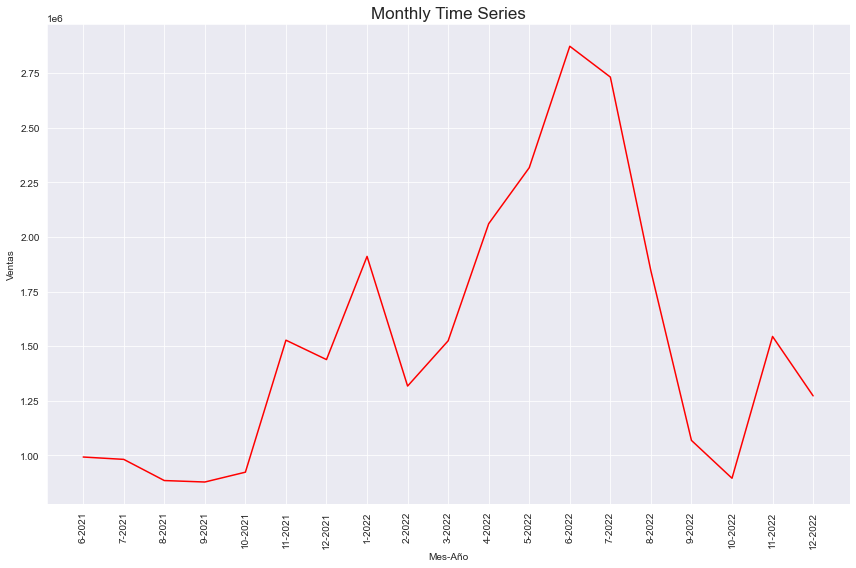

In [14]:
fig, ax = plt.subplots(figsize=(12,8))

p=sns.lineplot(x="Mes-Año", y="Ventas", data=Monthly_Time_Series_1 , color='red')

plt.setp(p.get_xticklabels(), rotation=90)

plt.title("Monthly Time Series",  fontsize = 17)

plt.tight_layout()

plt.show()

## Daily Time Series

In [15]:
Daily_Time_Series_1 = Time_Series_1.groupby(['Año', 'Mes','Dia'])['Ventas'].sum().reset_index(drop=False)

In [16]:
Daily_Time_Series_1

,Año,Mes,Dia,Ventas
0,2021,6,1,26423.78
1,2021,6,2,18752.01
2,2021,6,3,22812.84
3,2021,6,4,107889.11
4,2021,6,5,136714.44
...,...,...,...,...
574,2022,12,27,64542.49
575,2022,12,28,59913.84
576,2022,12,29,53815.43
577,2022,12,30,52695.32


In [17]:
Daily_Time_Series_1['Año'] = Daily_Time_Series_1['Año'].astype('string')
Daily_Time_Series_1['Mes'] = Daily_Time_Series_1['Mes'].astype('string')
Daily_Time_Series_1['Dia'] = Daily_Time_Series_1['Dia'].astype('string')

Daily_Time_Series_1['Dia-Mes-Año'] = Daily_Time_Series_1[['Dia', 'Mes', 'Año']].agg('-'.join, axis=1)

In [18]:
Daily_Time_Series_1

,Año,Mes,Dia,Ventas,Dia-Mes-Año
0,2021,6,1,26423.78,1-6-2021
1,2021,6,2,18752.01,2-6-2021
2,2021,6,3,22812.84,3-6-2021
3,2021,6,4,107889.11,4-6-2021
4,2021,6,5,136714.44,5-6-2021
...,...,...,...,...,...
574,2022,12,27,64542.49,27-12-2022
575,2022,12,28,59913.84,28-12-2022
576,2022,12,29,53815.43,29-12-2022
577,2022,12,30,52695.32,30-12-2022


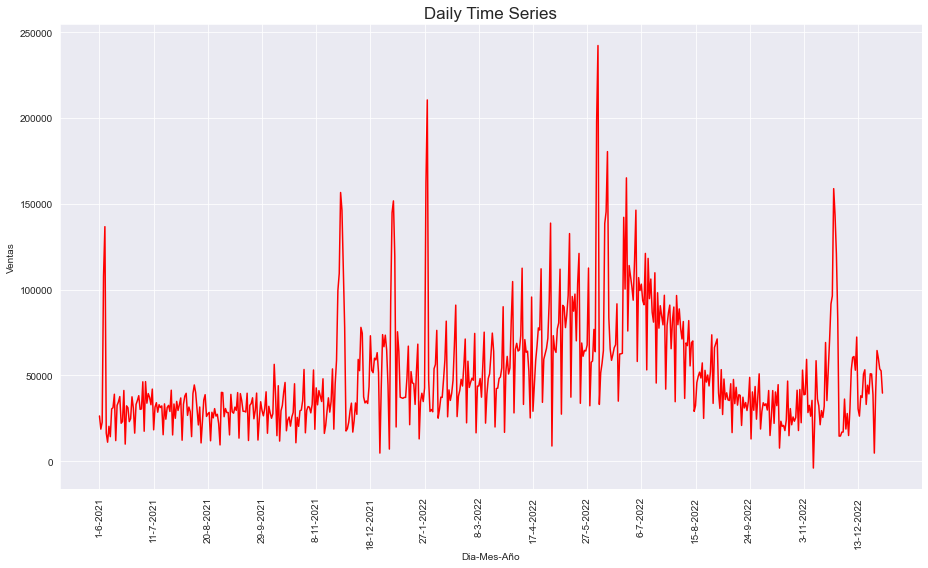

In [19]:
fig, ax = plt.subplots(figsize=(13,8))

p=sns.lineplot(x="Dia-Mes-Año", y="Ventas", data=Daily_Time_Series_1 , color='red')

p.set_xticks(np.arange(0 , len(Daily_Time_Series_1) , 40))

plt.setp(p.get_xticklabels(), rotation=90)

plt.title("Daily Time Series", fontsize = 17)

plt.tight_layout()

plt.show()

## Weekly Time Series

In [30]:
Weekly_Time_Series_1 = Time_Series_1.groupby(['Año', 'Mes','Semana'])['Ventas'].mean().reset_index(drop=False)

In [31]:
Weekly_Time_Series_1

,Año,Mes,Semana,Ventas
0,2021,6,22,85.373591
1,2021,6,23,33.751294
2,2021,6,24,41.767138
3,2021,6,25,44.411733
4,2021,6,26,41.607921
...,...,...,...,...
94,2022,12,48,38.640854
95,2022,12,49,46.582848
96,2022,12,50,55.785692
97,2022,12,51,47.887275


In [32]:
Weekly_Time_Series_1['Año'] = Weekly_Time_Series_1['Año'].astype('string')
Weekly_Time_Series_1['Mes'] = Weekly_Time_Series_1['Mes'].astype('string')
Weekly_Time_Series_1['Semana'] = Weekly_Time_Series_1['Semana'].astype('string')

Weekly_Time_Series_1['Semana-Mes-Año'] = Weekly_Time_Series_1[['Semana', 'Mes', 'Año']].agg('-'.join, axis=1)

In [33]:
Weekly_Time_Series_1

,Año,Mes,Semana,Ventas,Semana-Mes-Año
0,2021,6,22,85.373591,22-6-2021
1,2021,6,23,33.751294,23-6-2021
2,2021,6,24,41.767138,24-6-2021
3,2021,6,25,44.411733,25-6-2021
4,2021,6,26,41.607921,26-6-2021
...,...,...,...,...,...
94,2022,12,48,38.640854,48-12-2022
95,2022,12,49,46.582848,49-12-2022
96,2022,12,50,55.785692,50-12-2022
97,2022,12,51,47.887275,51-12-2022


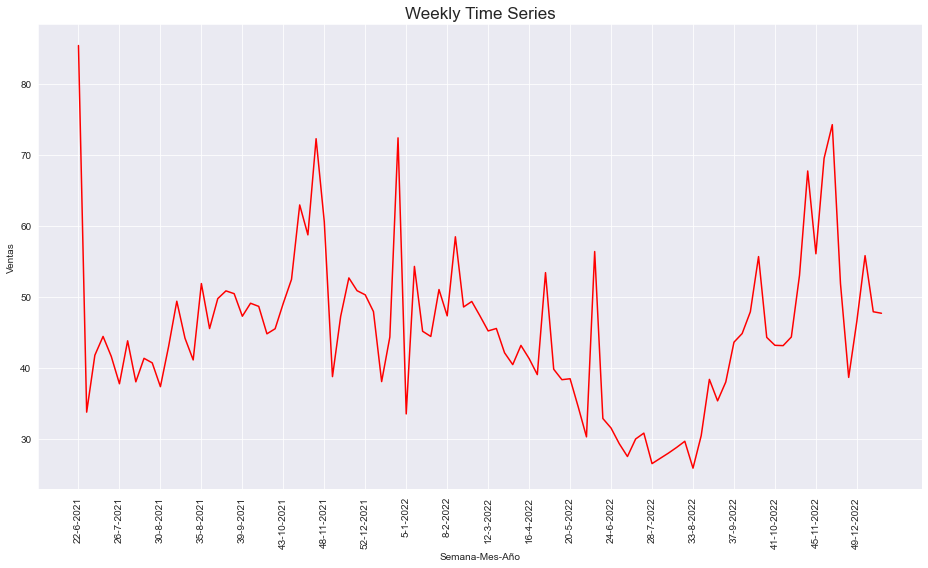

In [34]:
fig, ax = plt.subplots(figsize=(13,8))

p=sns.lineplot(x="Semana-Mes-Año", y="Ventas", data=Weekly_Time_Series_1 , color='red')

p.set_xticks(np.arange(0 , len(Weekly_Time_Series_1) , 5))

plt.setp(p.get_xticklabels(), rotation=90)

plt.title("Weekly Time Series",  fontsize = 17)

plt.tight_layout()

plt.show()

## Quarter Time Series

In [25]:
Quarter_Time_Series_1 = Time_Series_1.groupby(['Año', 'Trimestre'])['Ventas'].sum().reset_index(drop=False)

In [26]:
Quarter_Time_Series_1

,Año,Trimestre,Ventas
0,2021,2,992891.50
1,2021,3,2745995.05
2,2021,4,3889761.78
3,2022,1,4752970.27
4,2022,2,7249462.41
5,2022,3,5644448.99
6,2022,4,3713061.59


In [27]:
Quarter_Time_Series_1['Año'] = Quarter_Time_Series_1['Año'].astype('string')
Quarter_Time_Series_1['Trimestre'] = Quarter_Time_Series_1['Trimestre'].astype('string')

Quarter_Time_Series_1['Trimestre-Año'] = Quarter_Time_Series_1[['Trimestre', 'Año']].agg('-'.join, axis=1)

In [28]:
Quarter_Time_Series_1

,Año,Trimestre,Ventas,Trimestre-Año
0,2021,2,992891.50,2-2021
1,2021,3,2745995.05,3-2021
2,2021,4,3889761.78,4-2021
3,2022,1,4752970.27,1-2022
4,2022,2,7249462.41,2-2022
5,2022,3,5644448.99,3-2022
6,2022,4,3713061.59,4-2022


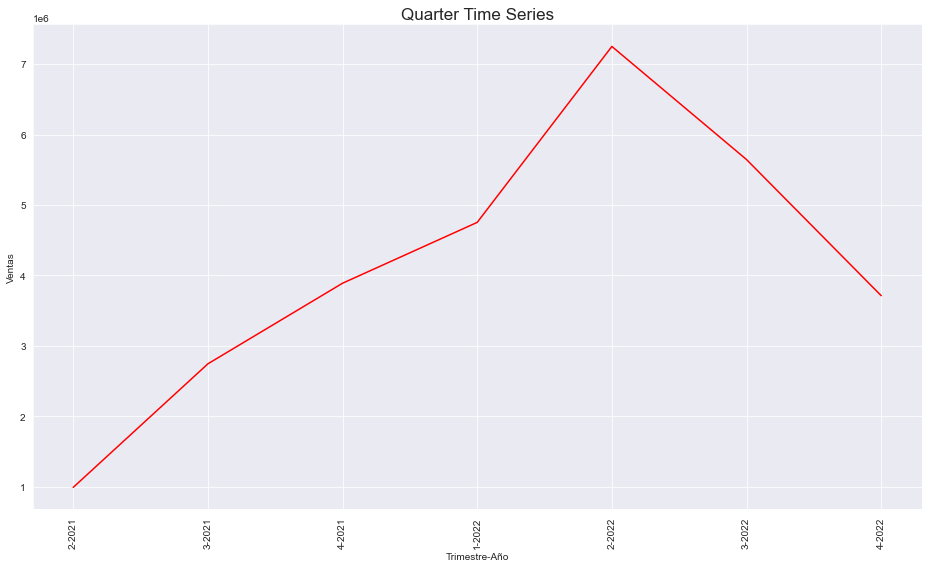

In [29]:
fig, ax = plt.subplots(figsize=(13,8))

p=sns.lineplot(x="Trimestre-Año", y="Ventas", data=Quarter_Time_Series_1 , color='red')

p.set_xticks(np.arange(0 , len(Quarter_Time_Series_1) , 1))

plt.setp(p.get_xticklabels(), rotation=90)

plt.title("Quarter Time Series",  fontsize = 17)

plt.tight_layout()

plt.show()

## Yearly Time Series

In [35]:
Time_Series_2 = pd.read_csv('Time_Series_2.csv')

In [36]:
Time_Series_2['Fecha'] = pd.to_datetime(Time_Series_2['Fecha'])

Time_Series_2['Dia'] = Time_Series_2['Fecha'].dt.day

Time_Series_2['Semana'] = Time_Series_2['Fecha'].dt.week

Time_Series_2['Mes'] = Time_Series_2['Fecha'].dt.month

Time_Series_2['Trimestre'] = Time_Series_2['Fecha'].dt.quarter

Time_Series_2['Año'] = Time_Series_2['Fecha'].dt.year

C:\Users\Usuario\AppData\Local\Temp\ipykernel_5144\590937400.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  Time_Series_2['Semana'] = Time_Series_2['Fecha'].dt.week


In [37]:
Time_Series_2.loc[:,['Importe', 'Fecha', 'Dia', 'Semana', 'Mes', 'Trimestre', 'Año']]

,Importe,Fecha,Dia,Semana,Mes,Trimestre,Año
0,120.0,2022-11-12,12,45,11,4,2022
1,25.0,2022-11-08,8,45,11,4,2022
2,25.0,2022-11-08,8,45,11,4,2022
3,57.0,2022-11-07,7,45,11,4,2022
4,245.0,2022-11-05,5,44,11,4,2022
...,...,...,...,...,...,...,...
1017,270.0,2018-09-17,17,38,9,3,2018
1018,375.0,2018-07-03,3,27,7,3,2018
1019,45.0,2018-06-21,21,25,6,2,2018
1020,365.0,2018-06-20,20,25,6,2,2018


In [38]:
Yearly_Time_Series_2 = Time_Series_2.groupby(['Año'])['Importe'].sum().reset_index(drop=False)

In [39]:
Yearly_Time_Series_2

,Año,Importe
0,2018,20584.60
1,2019,52704.27
2,2020,81690.09
3,2021,97683.53
4,2022,95286.31


In [40]:
Yearly_Time_Series_2['Año'] = Yearly_Time_Series_2['Año'].astype('string')

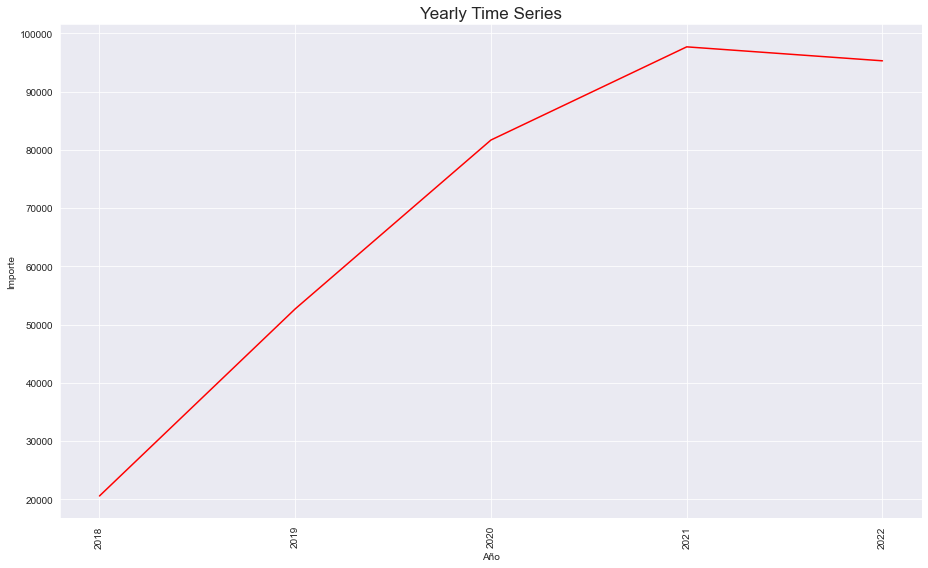

In [41]:
fig, ax = plt.subplots(figsize=(13,8))

p=sns.lineplot(x="Año", y="Importe", data=Yearly_Time_Series_2 , color='red')

p.set_xticks(np.arange(0 , len(Yearly_Time_Series_2) , 1))

plt.setp(p.get_xticklabels(), rotation=90)

plt.title("Yearly Time Series",  fontsize = 17)

plt.tight_layout()

plt.show()

## Gráfico de box-plots por mes

In [42]:
Time_Series_1_copy = Time_Series_1.copy()

In [43]:
Time_Series_1_copy['Año'] = Time_Series_1_copy['Año'].astype('string')
Time_Series_1_copy['Mes'] = Time_Series_1_copy['Mes'].astype('string')

Time_Series_1_copy['Mes-Año'] = Time_Series_1_copy[['Mes', 'Año']].agg('-'.join, axis=1)

In [46]:
Time_Series_1_copy

,Fecha,Dia,Semana,Mes,Trimestre,Año,Ventas,Mes-Año
0,2022-06-21,21,25,6,2,2022,59.99,6-2022
1,2021-08-03,3,31,8,3,2021,12.72,8-2021
2,2022-08-21,21,33,8,3,2022,11.20,8-2022
3,2022-07-09,9,27,7,3,2022,48.97,7-2022
4,2022-05-14,14,19,5,2,2022,22.95,5-2022
...,...,...,...,...,...,...,...,...
704350,2022-02-10,10,6,2,1,2022,18.90,2-2022
704351,2022-06-02,2,22,6,2,2022,-29.99,6-2022
704352,2022-05-19,19,20,5,2,2022,75.00,5-2022
704353,2022-02-17,17,7,2,1,2022,-10.70,2-2022


In [49]:
from datetime import datetime

# Definir el array de fechas:

Mes_Año = Time_Series_1_copy['Mes-Año'].unique()

# Convertir las fechas a objetos datetime y almacenarlos en una nueva lista:

Mes_Año_dt = [datetime.strptime(f, '%m-%Y') for f in Mes_Año]

# Ordenar la lista de fechas datetime:

Mes_Año_dt_sorted = sorted(Mes_Año_dt)

# Convertir los objetos datetime ordenados de nuevo a una lista de cadenas con formato "mes-año":

Mes_Año_dt_sorted = [datetime.strftime(f, '%m-%Y') for f in Mes_Año_dt_sorted]

# Eliminar los ceros iniciales:

Mes_Año_dt_sorted_sin_ceros = [x.lstrip('0')  if x.startswith('0')  else x   for x in Mes_Año_dt_sorted]

In [55]:
# Definir el array de fechas:

Mes_Año = Time_Series_1_copy['Mes-Año'].unique()
Mes_Año

array(['6-2022', '8-2021', '8-2022', '7-2022', '5-2022', '7-2021',
       '6-2021', '10-2021', '1-2022', '11-2021', '12-2022', '9-2022',
       '11-2022', '3-2022', '4-2022', '2-2022', '10-2022', '9-2021',
       '12-2021'], dtype=object)

In [56]:
# Convertir las fechas a objetos datetime y almacenarlos en una nueva lista:

Mes_Año_dt = [datetime.strptime(f, '%m-%Y') for f in Mes_Año]
Mes_Año_dt

[datetime.datetime(2022, 6, 1, 0, 0),
 datetime.datetime(2021, 8, 1, 0, 0),
 datetime.datetime(2022, 8, 1, 0, 0),
 datetime.datetime(2022, 7, 1, 0, 0),
 datetime.datetime(2022, 5, 1, 0, 0),
 datetime.datetime(2021, 7, 1, 0, 0),
 datetime.datetime(2021, 6, 1, 0, 0),
 datetime.datetime(2021, 10, 1, 0, 0),
 datetime.datetime(2022, 1, 1, 0, 0),
 datetime.datetime(2021, 11, 1, 0, 0),
 datetime.datetime(2022, 12, 1, 0, 0),
 datetime.datetime(2022, 9, 1, 0, 0),
 datetime.datetime(2022, 11, 1, 0, 0),
 datetime.datetime(2022, 3, 1, 0, 0),
 datetime.datetime(2022, 4, 1, 0, 0),
 datetime.datetime(2022, 2, 1, 0, 0),
 datetime.datetime(2022, 10, 1, 0, 0),
 datetime.datetime(2021, 9, 1, 0, 0),
 datetime.datetime(2021, 12, 1, 0, 0)]

In [57]:
# Ordenar la lista de fechas datetime:

Mes_Año_dt_sorted = sorted(Mes_Año_dt)
Mes_Año_dt_sorted

[datetime.datetime(2021, 6, 1, 0, 0),
 datetime.datetime(2021, 7, 1, 0, 0),
 datetime.datetime(2021, 8, 1, 0, 0),
 datetime.datetime(2021, 9, 1, 0, 0),
 datetime.datetime(2021, 10, 1, 0, 0),
 datetime.datetime(2021, 11, 1, 0, 0),
 datetime.datetime(2021, 12, 1, 0, 0),
 datetime.datetime(2022, 1, 1, 0, 0),
 datetime.datetime(2022, 2, 1, 0, 0),
 datetime.datetime(2022, 3, 1, 0, 0),
 datetime.datetime(2022, 4, 1, 0, 0),
 datetime.datetime(2022, 5, 1, 0, 0),
 datetime.datetime(2022, 6, 1, 0, 0),
 datetime.datetime(2022, 7, 1, 0, 0),
 datetime.datetime(2022, 8, 1, 0, 0),
 datetime.datetime(2022, 9, 1, 0, 0),
 datetime.datetime(2022, 10, 1, 0, 0),
 datetime.datetime(2022, 11, 1, 0, 0),
 datetime.datetime(2022, 12, 1, 0, 0)]

In [58]:
# Convertir los objetos datetime ordenados de nuevo a una lista de cadenas con formato "mes-año":

Mes_Año_dt_sorted = [datetime.strftime(f, '%m-%Y') for f in Mes_Año_dt_sorted]
Mes_Año_dt_sorted

['06-2021',
 '07-2021',
 '08-2021',
 '09-2021',
 '10-2021',
 '11-2021',
 '12-2021',
 '01-2022',
 '02-2022',
 '03-2022',
 '04-2022',
 '05-2022',
 '06-2022',
 '07-2022',
 '08-2022',
 '09-2022',
 '10-2022',
 '11-2022',
 '12-2022']

In [59]:
# Eliminar los ceros iniciales:

Mes_Año_dt_sorted_sin_ceros = [x.lstrip('0')  if x.startswith('0')  else x   for x in Mes_Año_dt_sorted]
Mes_Año_dt_sorted_sin_ceros

['6-2021',
 '7-2021',
 '8-2021',
 '9-2021',
 '10-2021',
 '11-2021',
 '12-2021',
 '1-2022',
 '2-2022',
 '3-2022',
 '4-2022',
 '5-2022',
 '6-2022',
 '7-2022',
 '8-2022',
 '9-2022',
 '10-2022',
 '11-2022',
 '12-2022']

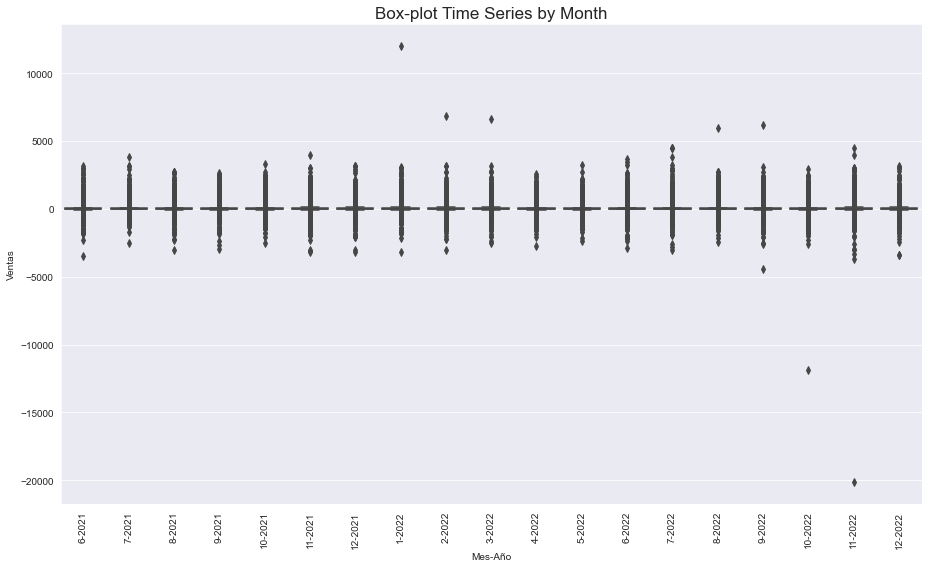

In [60]:
fig, ax = plt.subplots(figsize=(13,8))

p1 = sns.boxplot(x="Mes-Año", y="Ventas", data=Time_Series_1_copy, order=Mes_Año_dt_sorted_sin_ceros, showfliers=True)
 
plt.setp(p1.get_xticklabels(), rotation=90)

plt.title("Box-plot Time Series by Month",  fontsize = 17)

plt.tight_layout()

plt.show()

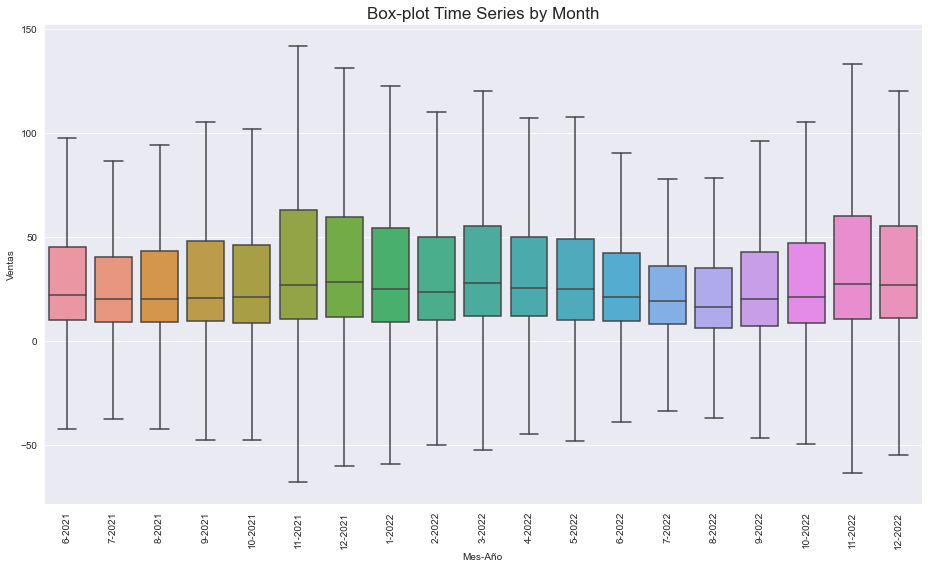

In [53]:
fig, ax = plt.subplots(figsize=(13,8))

p1 = sns.boxplot(x="Mes-Año", y="Ventas", data=Time_Series_1_copy, order=Mes_Año_dt_sorted_sin_ceros, showfliers=False)
 
plt.setp(p1.get_xticklabels(), rotation=90)

plt.title("Box-plot Time Series by Month",  fontsize = 17)

plt.tight_layout()

plt.show()